# Принятие решений в бизнесе

В нашем распоряжении 3 файла: hypothesis.csv содержащий данные о 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort и файлы orders.csv и visitors.csv в которых описаны результаты A/B-теста.

Цель исследования: приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

Ход исследования:

- Приоритизация гипотез: 
1. Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
2. Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
3. Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

- Анализ A/B-теста:
1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
14. Примите решение по результатам теста и объясните его. Варианты решений:
- Остановить тест, зафиксировать победу одной из групп.
- Остановить тест, зафиксировать отсутствие различий между группами.
- Продолжить тест.

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## Приоритизация гипотез

Загрузим файл с гипотезам

In [2]:
try:
    data = pd.read_csv('/datasets/hypothesis.csv', sep=',')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv', sep=',')

In [3]:
pd.set_option('max_colwidth', 130)

In [4]:
display(data)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Приводим к нижнему регистру

In [5]:
data.columns = data.columns.str.lower()

Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета

In [6]:
data['ice'] = round(data['impact']*data['confidence']/data['efforts'], 2)

In [7]:
pd.set_option('max_colwidth', 130)

In [8]:
display(data[['hypothesis','ice']].sort_values(by='ice', ascending=False))

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


По фреймворку ICE наиболее приоритетными были гипотезы:

- Запустить акцию, дающую скидку на товар в день рождения;

- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [9]:
data['rice'] = data['reach']*data['impact']*data['confidence']/data['efforts']

In [10]:
pd.set_option('max_colwidth', 130)

In [11]:
display(data[['hypothesis','rice']].sort_values(by='rice', ascending=False))

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


по фреймворку RICE наиболее приоритетные гипотезы расположились следующим образом:

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;

- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;

- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

Вывод:

По фреймворку ICE наиболее приоритетными были гипотезы:

- Запустить акцию, дающую скидку на товар в день рождения;

- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

А по фреймворку RICE наиболее приоритетные гипотезы расположились следующим образом:

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;

- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;

- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

Это произошло потому что фреймворк RICE учитывает параметр Reach (скольких пользователей затронет изменение, которое вы хотите внести), и в лидеры вышли гипотезы с наибольшим охватом пользователей. Для ICE этот критерий не учитывается.

## Анализ A/B-теста

### График кумулятивной выручки по группам

Для начала запишем данные из имеющихся датафреймов в переменные orders и visitors соответственно и посмотрим как выглядят таблицы.

In [12]:
try:
    orders = pd.read_csv('/datasets/orders.csv', sep=',')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv', sep=',')

In [13]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [15]:
 print(orders.isna().sum())

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


In [16]:
print(orders.duplicated().sum())

0


In [17]:
try:
    visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
except:
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv', sep=',')

In [18]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [19]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [20]:
print(visitors.isna().sum())

date        0
group       0
visitors    0
dtype: int64


In [21]:
print(visitors.duplicated().sum())

0


Приведем тип данных в столбцах date в обоих датафреймах к типу datetime

In [22]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [23]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [24]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [25]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [26]:
print(orders['group'].unique())

['B' 'A']


В АВ-тесте присутсвуют 2 группы

In [27]:
print(orders['date'].min())

2019-08-01 00:00:00


In [28]:
print(orders['date'].max())

2019-08-31 00:00:00


Начало теста 2019-08-01, конец 2019-08-31.

In [29]:
group_ab = orders.groupby('group')['visitorId'].nunique()

In [30]:
print(group_ab)

group
A    503
B    586
Name: visitorId, dtype: int64


Группы не равномерны, в группе "В" больше пользователей.

Cоздаем массив уникальных пар значений дат и групп теста

In [35]:
datesGroups = orders[['date','group']].drop_duplicates()

Получим строки таблицы orders, дата которых меньше или равна дате элемента из datesGroups, а группа теста равна группе из datesGroups.

Результат запишем в датафрейм ordersAgregated

In [36]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId' : 'nunique', 
            'visitorId' : 'nunique', 
            'revenue' : 'sum'
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

Аналогично visitorsAggregated

In [37]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

Объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия

In [38]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

In [39]:
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [40]:
print(cumulativeData.head())

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


In [41]:
print(cumulativeData['date'].min())

2019-08-01 00:00:00


In [42]:
print(cumulativeData['date'].max())

2019-08-31 00:00:00


Минимальная и максимальная даты в датафрейме cumulativeData совпадает с минимальной и максимальной датой в исходных данных.

График кумулятивной выручки по группам

In [43]:
sns.set(font_scale=2, style='whitegrid', rc={'figure.figsize':(15,7)})

In [44]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

In [45]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

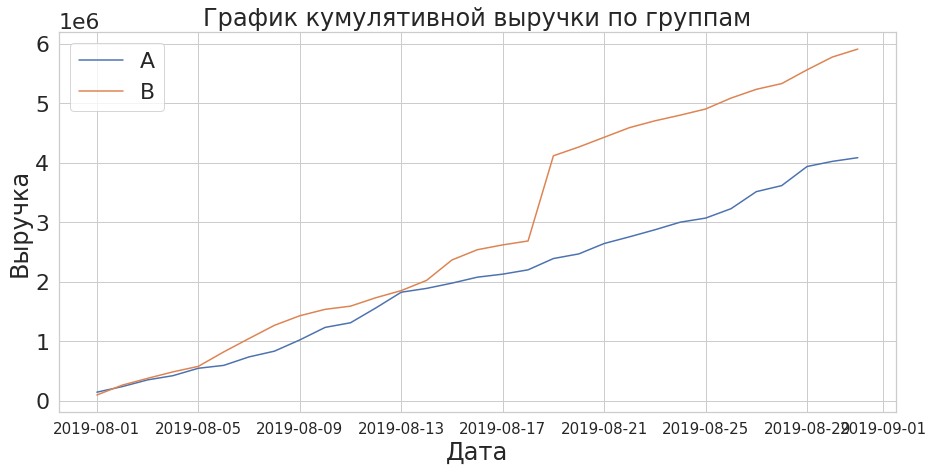

In [46]:
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

# размер шрифта по оси х
plt.tick_params(axis='x', which='major', labelsize=15)

plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend()

Исходя из графика можно сказать, что: 
    
- выручка стабильно растет на протяжении всего теста в обоих группах;

- в начале теста метрика имеют близкие значения в обоих группах;

- у группы B наблюдается резкий всплеск после 17.08, который может быть связан с резким увеличением заказов в этот день, либо о появлении очень дорогих заказов в выборке;

- после выброса в группе B выручки в обоих группах стабилизируются и растут практически одинаково;

- Однозначно утверждать, что группа B лучше на данном шаге нельзя.

### График кумулятивного среднего чека по группам

In [47]:
sns.set(font_scale=2, style='whitegrid', rc={'figure.figsize':(15,7)})

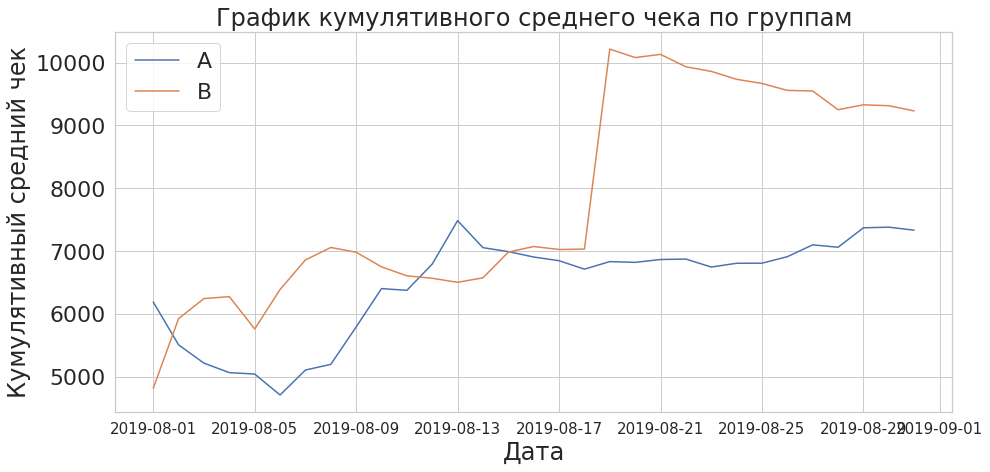

In [48]:
# график среднего чека группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

# график среднего чека группы В
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

# размер шрифта по оси x
plt.tick_params(axis='x', which='major', labelsize=15)

plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный cредний чек')
plt.legend()

В целом к концу теста метрика стабилизируется в обоих группах.

Группа А, в отличии от группы В более равномерна, к концу теста средний чек почти сравнялся с максимальным значением, достигнутым 13 августа.

Выделяется аномальный рост среднего чека 18-19 августа по группе В, а затем снижение. Возможно, в группу B в первой половине теста попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

### График относительного изменения кумулятивного среднего чека группы В к группе А

Построим график относительного различия для среднего чека.

In [49]:
sns.set(font_scale=2, style='whitegrid', rc={'figure.figsize':(15,7)})

Text(0, 0.5, 'Кумулятивный cредний чек')

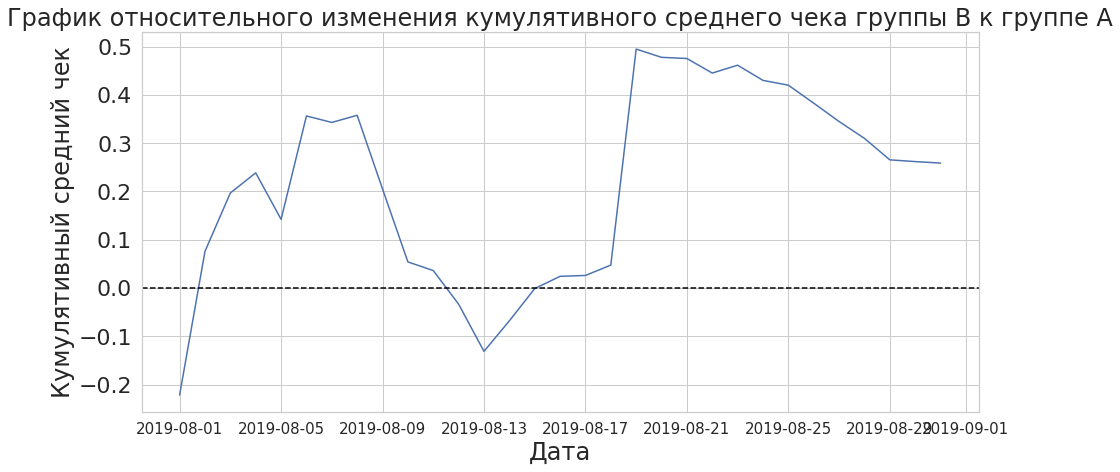

In [50]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

# размер шрифта по оси x
plt.tick_params(axis='x', which='major', labelsize=15)

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный cредний чек')

На графике видим резкие скачки, это может значит, что именно в пиковый дни на графике, были сделаны анамально дорогие заказы.

### График кумулятивного среднего количества заказов на посетителя по группам

Text(0, 0.5, 'Кумулятивная конверсия')

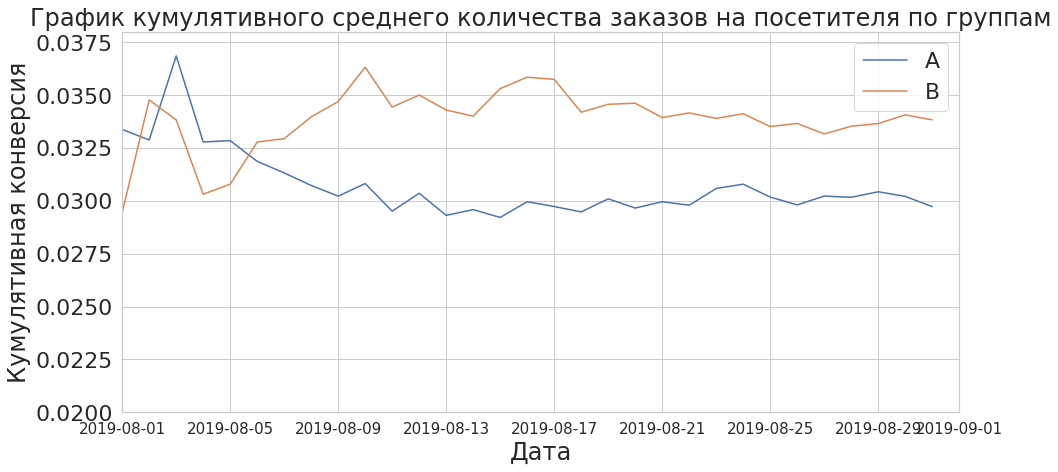

In [51]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# размер шрифта по оси x
plt.tick_params(axis='x', which='major', labelsize=15)

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.020, 0.038])

plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия')

В начале теста наблюдаем заметные колебания. В начале конверсия у группы А была больше группы B, но уже к концу первой недели тестирования конверсия группы В выросла, а группы А снизилась, после чего графики начали стремиться к стабилизации
К 11-12 августа различие в конверсии у обоих групп становится очевидно, и начинает фиксироваться.
Примерно к 20 августа колебания максимально сглаживаются.
В целом, конверсия у группы В стабильно лучше по накопленным показателям чем A.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

Построим график относительного изменения кумулятивных конверсий

In [52]:
sns.set(font_scale=2, style='whitegrid', rc={'figure.figsize':(25,10)})

Text(0, 0.5, 'Кумулятивная конверсия')

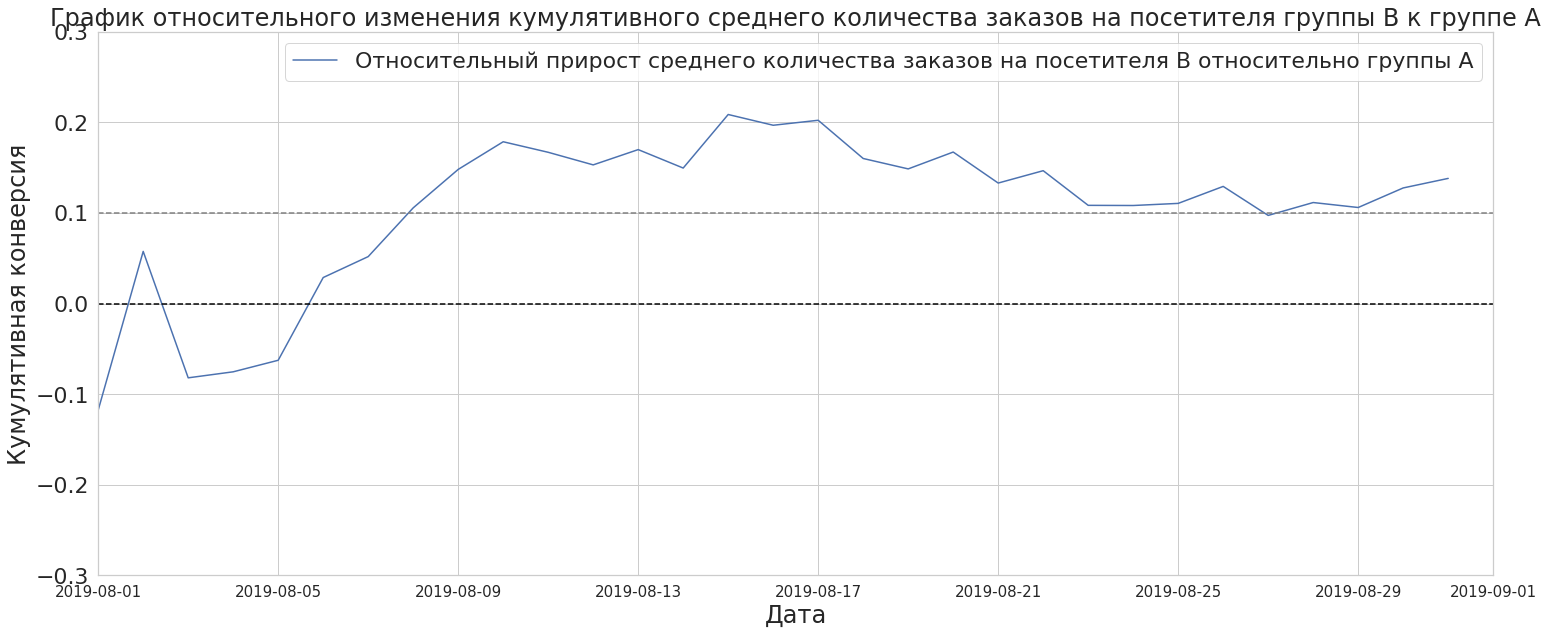

In [53]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост среднего количества заказов на посетителя B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.3, 0.3])

# размер шрифта по оси x
plt.tick_params(axis='x', which='major', labelsize=15)

plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия')

График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту.
C самого начала теста, метрика группа В меньше группы А, но с 6 августа вырвалась вперед и стабильно росла до своего пика 15.08 в 21%, далее метрика начинается снижаться и стремиться к стабилизации.
В целом отношение конверсии стремится примерно к уровню 13-17% в пользу B, но в последние дни теста еще растет. Скорее всего отношение конверсии еще полностью не установилось, и сейчас делать какие-либо однозначные выводы по тесту еще нельзя, но на первый взгляд B выглядит интереснее в плане конверсии.

### Точечный график количества заказов по пользователям

Для начала посмотрим топ количества заказов в табличном виде

In [54]:
ordersByUsers = (orders.groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))

In [55]:
ordersByUsers.columns = ['visitorId', 'orders']

In [56]:
ordersByUsers.sort_values(by='orders', ascending=False).head()

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


Теперь построим точечный график количества заказов по пользователям

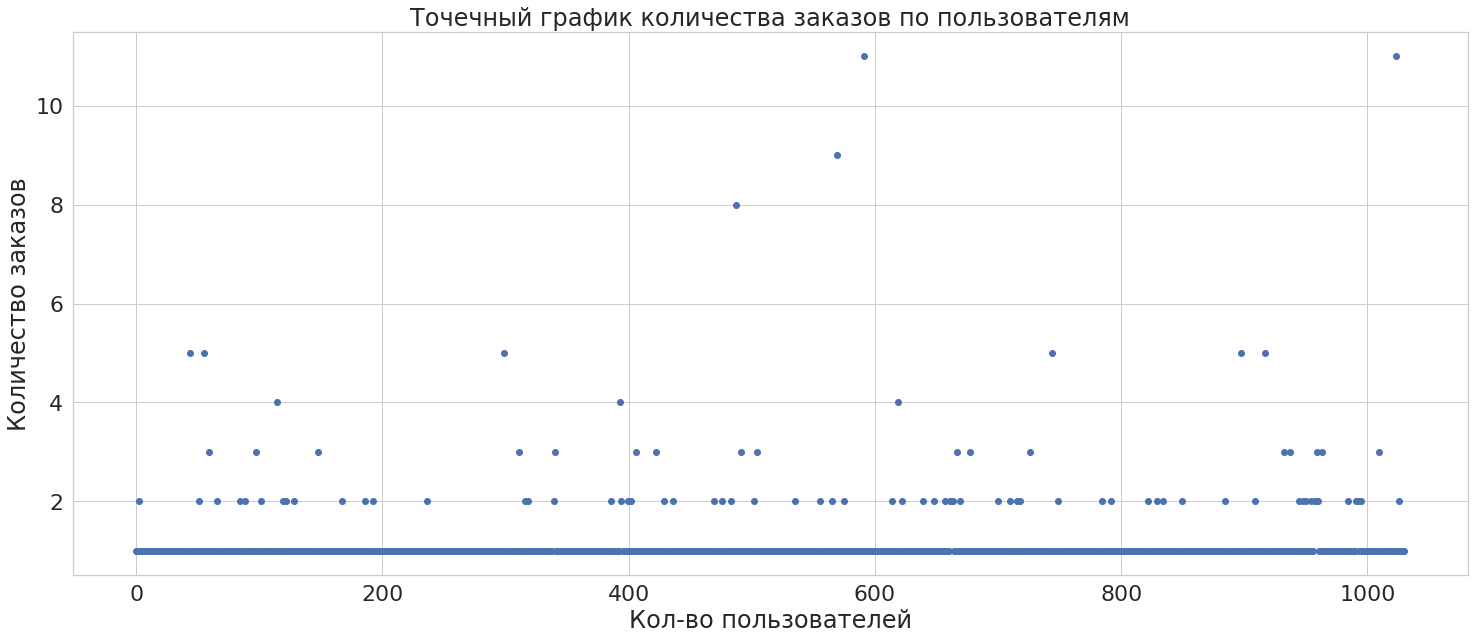

In [57]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']);

plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Кол-во пользователей')
plt.ylabel('Количество заказов');

Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-5 заказами тоже значительна. Их точная доля не ясна — непонятно, считать их аномалиями или нет.

### Посчитаем выборочные 95-й и 99-й перцентили количества заказов на пользователя

In [58]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Устанавливаем границу по колличеству заказов на пользователя в 3 шт., заключим её в переменную:

In [59]:
to_much_orders = 3

Не более 5% пользователей оформляли от 2-х заказов и 1% пользователей - больше четырех заказов.

### Точечный график стоимости заказов

Посмотрим в табличном виде топ по стоимости заказов

In [60]:
orders.sort_values(by='revenue', ascending=False).head()

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B


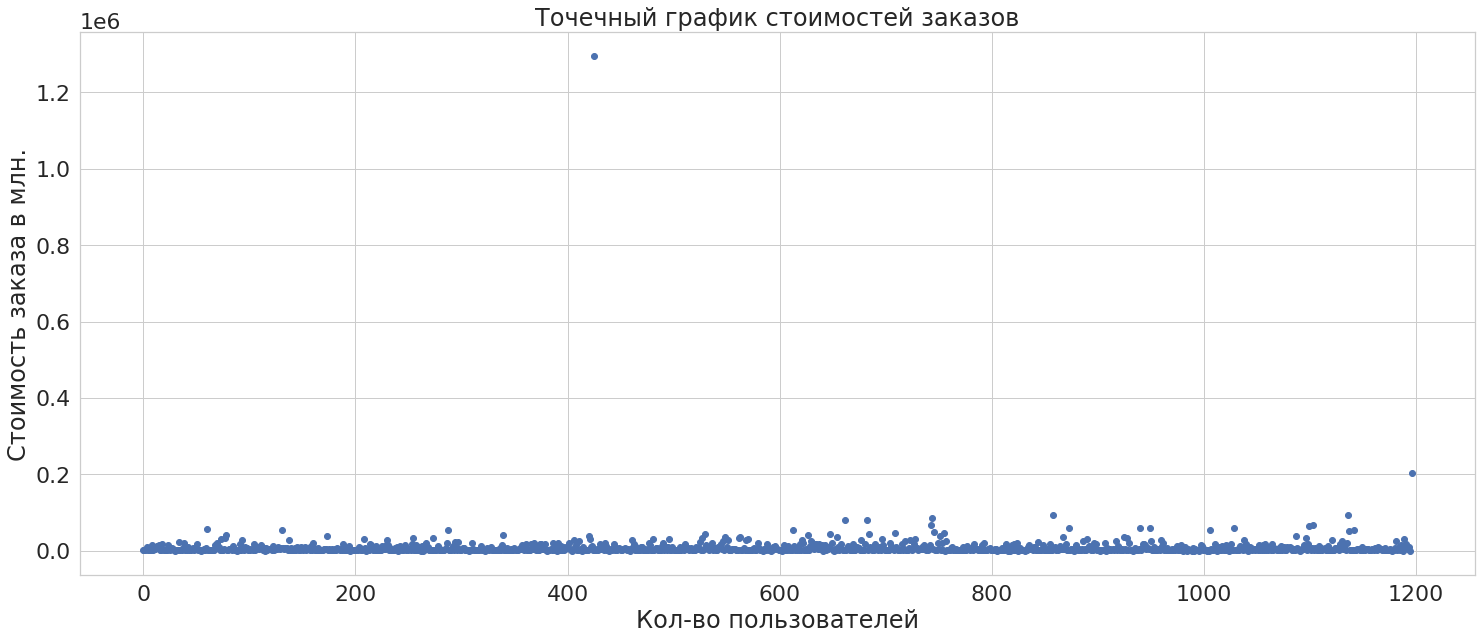

In [61]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Кол-во пользователей')
plt.ylabel('Стоимость заказа в млн.');

На графике зафиксирован один самый крупный заказ на сумму 1 294 500. Далее виден заказ в размере 202 740 Все остальные заказы ниже 92 550. Для того, чтобы точно определить стоимость заказа, которую следует считать аномальной посчитаем выборочные перцентели.

### Посчитаем выборочные 95-й и 99-й перцентили стоимости заказов

In [62]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Не более, чем у 5% пользователей чек дороже 28000, и только не более 1% пользователей оформили на чек дороже 58233,2.

Устанавливаем границу по сумме заказа в 30000 рублей, добавим её в переменную:

In [63]:
to_expensive_order  = 30000

### Подсчёт статистической значимости различий в конверсии между группами по «сырым» данным

Cтатистическую значимость различий будет считать с помощью теста Манна-Уитни, для начала подготовим данные:

In [64]:
orders_by_users_a = orders[orders['group']=='A'].groupby('visitorId')['transactionId'].nunique().reset_index()
orders_by_users_a.columns=['visitorId','orders']

orders_by_users_b = orders[orders['group']=='B'].groupby('visitorId')['transactionId'].nunique().reset_index()
orders_by_users_b.columns=['visitorId','orders'] 

In [65]:
display(orders_by_users_a.head()) 

,visitorId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [66]:
display(orders_by_users_b.head()) 

,visitorId,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


Объявите переменные, в которых пользователям с заказами будет соответствовать число заказов пользователя, пользователям без заказов — нули.

In [67]:
sample_a = pd.concat(
    [
        orders_by_users_a['orders'],
        pd.Series(0, 
                  index=np.arange
                  (visitors[visitors['group']=='A']['visitors'].sum() - len(orders_by_users_a['orders'])
                  ),
                  name='orders'
                 )
    ],
    axis=0)
sample_b = pd.concat(
    [
        orders_by_users_b['orders'],
        pd.Series
        (0,
         index=np.arange(
             visitors[visitors['group']=='B']['visitors'].sum() - len(orders_by_users_b['orders'])
         ),
         name='orders'
        )
    ],
    axis=0)

Данные подготовлены, сформируем нулевую и альетрнативную гипотезы:

Н0: Различий в конверсии между группами нет

Н1: Различия в конверсиях между группами есть

Коэффициент альфа: 0.05

In [68]:
result_1 = stats.mannwhitneyu(sample_a, sample_b)[1] 
#задаим значение aplha
alpha = 0.05
#введем значение p-value
print(f'Значение p-value : {result_1}')
# условный оператор с выводом строки с ответом
if result_1 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  
print('Средняя конверсия группы А: {:.1%}'.format(sample_a.mean()))
print('Средняя конверсия группы B: {:.1%}'.format(sample_b.mean()))  
print('Отношение конверсии В к А: {0:.3f}'.format(sample_b.mean()/sample_a.mean()-1))   

Значение p-value : 0.016792355056752608
Отвергаем нулевую гипотезу
Средняя конверсия группы А: 3.0%
Средняя конверсия группы B: 3.4%
Отношение конверсии В к А: 0.138


P-value меньше заданного значения alpha - отвергаем нулевую гипотезу, следовательно верно утвеждение о том, что различия в конверсиях есть.

Отношений конверсий группы А к В 0.138, что можно интропритировать как относительный прирост в 14%, что является не плохим результатом, на следующих этапах посмотрим какое значения будут иметь данные без аномалий

### Подсчёт статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем гипотезы:

Н0: Различий в средних чеках между группами нет

Н1: Различия в средних чеках между группами есть

Коэффициент альфа: 0.05

In [69]:
result_2 = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]  
#введем значение p-value
print(f'Значение p-value : {result_2}')
# условный оператор с выводом строки с ответом
if result_2 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  
#выведем основные показатели
print('Средний чек группы А: {:.2f}'.format(orders[orders['group']=='A']['revenue'].mean()))
print('Средний чек группы B: {:.2f}'.format(orders[orders['group']=='B']['revenue'].mean())) 
print('Средний чек группы B: {:.2f}'.format(orders[orders['group']=='B']['revenue'].mean() / orders[orders['group']=='A']['revenue'].mean()))  

Значение p-value : 0.7292909855432458
Не получилось отвергнуть нулевую гипотезу
Средний чек группы А: 7333.58
Средний чек группы B: 9230.88
Средний чек группы B: 1.26


P-value значительно больше alpha, значит принимаем нулевую гипотезу - статичстичкой значимости различий в средних чеках нет, несмотря на разницу общего среднего значения по группам, которая составила в абсолютных значений 26%

### Подсчёт статистической значимости различий в конверсии между группами по «очищенным» данным

Ранее изучили распредление заказов по кол-ву для пользователя и сумме, границы были опредлены следующие:

кол-во > 3, перемиенная to_much_orders

сумма > 30000, переменная to_expensive_order

Посмотрим, сколько в датафрейме анамальных пользователей:

In [70]:
# собираем пользователей с большим кол-вом заказов 
many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > to_much_orders]['visitorId'],
        orders_by_users_b[orders_by_users_b['orders'] > to_much_orders]['visitorId'],
    ],
    axis=0,
)

# собираем пользователей с слишком дорогими заказами
expensive_orders = orders[orders['revenue'] > to_expensive_order]['visitorId']

# объединяем всё в один датафрейм 
abnormal_users = (
    pd.concat([many_orders, expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormal_users.head(5))
print(' ')
print('Кол-во анамальных пользователей: ', abnormal_users.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
Name: visitorId, dtype: int64
 
Кол-во анамальных пользователей:  57


Такое кол-во может повлиять на итоговые выводы, используем полученные данные для того, чтобы убрать аномалии:

In [71]:
#отфильтруем данные в группе А 
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitorId'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#отфильтруем данные в группе В
sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitorId'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='B']['visitors'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)  

Анамалии убрали, гипотезы для проведеня теста, по аналогии с предыдущими:

Н0: Конверсии групп A и B равны, статистически значимых отличий нет

Н1: Конверсии групп A и B различны, статистически значимые отличия есть

Коэффициент альфа: 0.05

In [72]:
result_3 = stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1] 
#ведем значение pvalue
print(f'Значение p-value : {result_3}') 
# условный оператор с выводом строки с ответом
if result_3 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
print('Средняя конверсия (очищенная) группы А: {:.1%}'.format(sample_a_filtered.mean()))
print('Средняя конверсия (очищенная) группы B: {:.1%}'.format(sample_b_filtered.mean())) 
print('Отношение конверсии В к А, по очищенным данным: {0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))  

Значение p-value : 0.01831750089424907
Отвергаем нулевую гипотезу
Средняя конверсия (очищенная) группы А: 2.7%
Средняя конверсия (очищенная) группы B: 3.1%
Отношение конверсии В к А, по очищенным данным: 0.148


Для "очищенных" данных также справедливо утверждение о том, что конверсии разные. Само значения конверсии данных изменилось в меньшую сторону для обоих групп, лидируют по-прежнему пользователи из B.

### Подсчёт статистической значимости различий в различий в среднем чеке заказа по «очищенным» данным

Для "сырых" данных была принята нулевая гипотеза, проверим можем ли мы говорить о статистическом равенстве для "очищенных" данных:

Н0: Различий в средних чеках между группами нет

Н1: Различия в средних чеках между группами есть

Коэффициент альфа: 0.05

In [73]:
result4 = stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'])[1] 

#посчитаем среднием значения 
mean_revenue_b = orders[np.logical_and(orders['group']=='B',
                                       np.logical_not(orders['visitorId'].
                                                      isin(abnormal_users)))]['revenue'].mean()
mean_revenue_a = orders[np.logical_and(orders['group']=='A',
                                       np.logical_not(orders['visitorId'].
                                                      isin(abnormal_users)))]['revenue'].mean() 

print(f'Значение p-value : {result4}')  
# условный оператор с выводом строки с ответом
if result4 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  
#выведем всю необходимую информацию
print('Средняя чек группы А (очищенная): {:.1f}'.format(mean_revenue_b))
print('Средняя конверсиягруппы B (очищенная): {:.1f}'.format(mean_revenue_a))
print('Отношение конверсии В к А, по очищенным данным: {0:.2f}'.format(mean_revenue_b / mean_revenue_a)) 

Значение p-value : 0.9583231483662625
Не получилось отвергнуть нулевую гипотезу
Средняя чек группы А (очищенная): 5228.2
Средняя конверсиягруппы B (очищенная): 5333.3
Отношение конверсии В к А, по очищенным данным: 0.98


Для "очищенных" данных статистическая занчимость средних чеков группы B и A, также равны, но стоит заметить, что абсолютные значения практически выровнились, отношение близко к единице

Вывод:
    
Выручка стабильно растет на протяжении всего теста в обоих группах, у группы B наблюдается резкий всплеск после 17.08,
В целом к концу теста метрика стабилизируется в обоих группах. 

Группа А, в отличии от группы В более равномерна, к концу теста средний чек почти сравнялся с максимальным значением, достигнутым 13 августа.
Выделяется аномальный рост среднего чека 18-19 августа по группе В, а затем снижение. Возможно, в группу B в первой половине теста попали крупные заказы (резкий всплеск на графике).
Исходя из графика куммулятивной конверсии видно, что в начале теста наблюдаем заметные колебания. В начале конверсия у группы А была больше группы B, но уже к концу первой недели тестирования конверсия группы В выросла. В целом, конверсия у группы В стабильно лучше по накопленным показателям чем A.

График различия среднего чека колеблется.

Большинство покупателей заказывали только один раз. Не более 5% пользователей оформляли от 2-х заказов и 1% пользователей - больше четырех заказов.

Не более, чем у 5% пользователей чек дороже 28000, и только не более 1% пользователей оформили на чек дороже 58233,2. Один самый крупный заказ на сумму 1 294 500

Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после "очищенных" данных. 
Отношений конверсий группы А к В 0.138, что можно интропритировать как относительный прирост в 14%.
Для "очищенных" данных также справедливо утверждение о том, что конверсии разные. Само значения конверсии данных изменилось в меньшую сторону для обоих групп, лидируют по-прежнему пользователи из B.

По сырым данным нет статистически значимого различия по среднему чеку между группами. Так же как и после удаления аномалий статистически значимых различий нет.
P-value значительно больше alpha, значит принимаем нулевую гипотезу - статичстичкой значимости различий в средних чеках нет, несмотря на разницу общего среднего значения по группам, которая составила в абсолютных значений 26%.
Для "очищенных" данных статистическая занчимость средних чеков группы B и A, также равны, но стоит заметить, что абсолютные значения практически выровнились, отношение близко к единице.

Исходя из обнаруженных фактов, тест следует остановить, признать его успешным и перейти к проверке следующей гипотезы.

# Общий вывод

Вывод:
    
В Приоритизация гипотез можно выделить следующее:
    
1. По фреймворку ICE наиболее приоритетными были гипотезы:

- Запустить акцию, дающую скидку на товар в день рождения;

- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

2. А по фреймворку RICE наиболее приоритетные гипотезы расположились следующим образом:

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;

- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;

- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

Это произошло потому что фреймворк RICE учитывает параметр Reach (скольких пользователей затронет изменение, которое вы хотите внести), и в лидеры вышли гипотезы с наибольшим охватом пользователей. Для ICE этот критерий не учитывается.   


При Анализе A/B-теста можно сделать вывод о том, что:

Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после "очищенных" данных.

По сырым данным нет статистически значимого различия по среднему чеку между группами. Так же как и после удаления аномалий статистически значимых различий нет.

График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту.

График различия среднего чека колеблется. Сделать из этого графика определённые выводы нельзя.

Исходя из обнаруженных фактов, тест следует остановить, признать его успешным и перейти к проверке следующей гипотезы.